# Jupyter Notebook used to create visuals for my talk "Making a Career in Data Science" at DataJawn 2019
## Slides and data can be found at https://github.com/mdbecker/datajawn2019
## The survey used to collect data can be found at https://bit.ly/SurveyJawn

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from collections import Counter

In [3]:
sns.set_context('poster')
sns.set_palette('colorblind')

In [4]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [5]:
def male_or_not(gen):
    if gen != 'Male' and pd.notna(gen):
        return 'Not Male'
    return gen

def fix_degree(degree):
    if pd.isna(degree):
        return degree
    elif degree == 'Science/Math (Chemistry, biology, physics, etc...)':
        return 'Science/Math'
    elif degree in {'Engineering', 'Business'}:
        return degree
    elif degree in {'Computer Science', 'IT'}:
        return 'CS/IT'
    elif degree.lower().count('analytics'):
        return 'Business'
    elif degree.lower().count('market'):
        return 'Business'
    elif degree.lower().count('economic'):
        return 'Business'
    elif degree.lower().count('math'):
        return 'Science/Math'
    elif degree.lower().count('computer sci'):
        return 'CS/IT'
    elif degree.lower().count('information'):
        return 'CS/IT'
    elif degree.lower().count('ling'):
        return 'CS/IT'
    elif degree.lower().count('engineer'):
        return 'Engineering'
    elif degree.lower().count('soci'):
        return 'Social Science'
    elif degree.lower().count('psych'):
        return 'Social Science'
    elif degree.lower().count('polit'):
        return 'Social Science'
    elif degree.lower().count('health'):
        return 'Social Science'
    elif degree.lower().count('data sci'):
        return 'Science/Math'
    else:
        return 'Other'

def plot_cat(df, col, order, title, fudge=.5):
    order_f = [val for val in order if val in set(df[col].unique())]
    f, ax = plt.subplots(figsize=(30, 15))
    ax = sns.countplot(y=col, data=df, ax=ax, order=order_f)
    total = float(len(df[df[col].notna()]))
    for p in ax.patches:
        width = p.get_width()
        ax.text(width+fudge,
                p.get_y() + p.get_height()/1.8,
                '{:.0%}'.format(width/total),
                ha="center") 
    ax.set_ylabel('')
    ax.set_title(title)
    sns.despine()
    f.tight_layout()
    
def plot_cat_by(df, col, order, title, by='Male'):
    f, ax = plt.subplots(figsize=(30, 15))
    ax = sns.countplot(x=by, hue=col, data=df, ax=ax)
    ax.set_xlabel('')
    ax.set_title(title)
    ax.legend(loc=0)
    sns.despine()
    f.tight_layout()
    
def plot_bar_multi_v(df, field, replace, order, title, fudge=0.02, ax=None):
    df2 = df[field].dropna().str.get_dummies(sep=';')
    for col in set(order) - set(df2.columns):
        df2[col] = 0
    df2 = df2[order]
    wide_df = []
    for i, r in df2.iterrows():
        for col in df2.columns:
            wide_df.append({'row': i, 'col': col, 'value': r[col]})
    wide_df = pd.DataFrame(wide_df)
    for k, v in replace.items():
        wide_df['col'].replace(k, v, inplace=True)
    order_f = [replace.get(o, o) for o in order if o in set(df2.columns)]
    if ax is None:
        f, ax = plt.subplots(figsize=(30, 15))
    sns.barplot(x='value', y='col', data=wide_df, ax=ax, ci=None, order=order_f)
    for p in ax.patches:
        width = p.get_width()
        ax.text(width+fudge,
                p.get_y() + p.get_height()/1.8,
                '{:.0%}'.format(width),
                ha="center")
    ax.set_ylabel('')
    ax.set_xlabel('')
    ax.set_title(title)
    sns.despine()
    
def plot_bar_multi(df, field, replace, order, title):
    df2 = df[field].replace(replace, np.nan).dropna().str.get_dummies(sep=';')
    wide_df = []
    for i, r in df2.iterrows():
        for col in df2.columns:
            wide_df.append({'row': i, 'col': col, 'value': r[col]})
    wide_df = pd.DataFrame(wide_df)
    if isinstance(replace, dict):
        for k, v in replace.items():
            wide_df['col'].replace(k, v, inplace=True)
    wide_df = wide_df.sort_values(['row', 'col', 'value']).drop_duplicates(subset=['row', 'col'], keep='last')
    f, ax = plt.subplots(figsize=(30, 15))
    sns.barplot(x='value', y='col', data=wide_df, ax=ax, ci=None, order=order)
    total = float(len(df2))
    for p in ax.patches:
        width = p.get_width()
        ax.text(width+0.02,
                p.get_y() + p.get_height()/1.8,
                '{:.0%}'.format(width),
                ha="center")
    ax.set_ylabel('')
    ax.set_xlabel('')
    ax.set_title(title)
    sns.despine()

In [6]:
df = pd.read_csv('survey.csv')

In [7]:
df['Male'] = df['Would you identify as'].apply(male_or_not)

In [8]:
df = df[(df['Which best describes your current role?'] == 'Data Scientist') | (df['Are you interested in a career in Data Science?'] == 'Yes')]
df.shape

(162, 19)

# About 2/3 of respondents are not Data Scientists. But as Vicki Boykis has pointed out, it’s often easier to come into a data science job through the back door. Vicki started off as an Analyst. I used to be a Software Engineer. In my experience almost no one takes a direct path to a Data Science role. So maybe consider an alternative path?

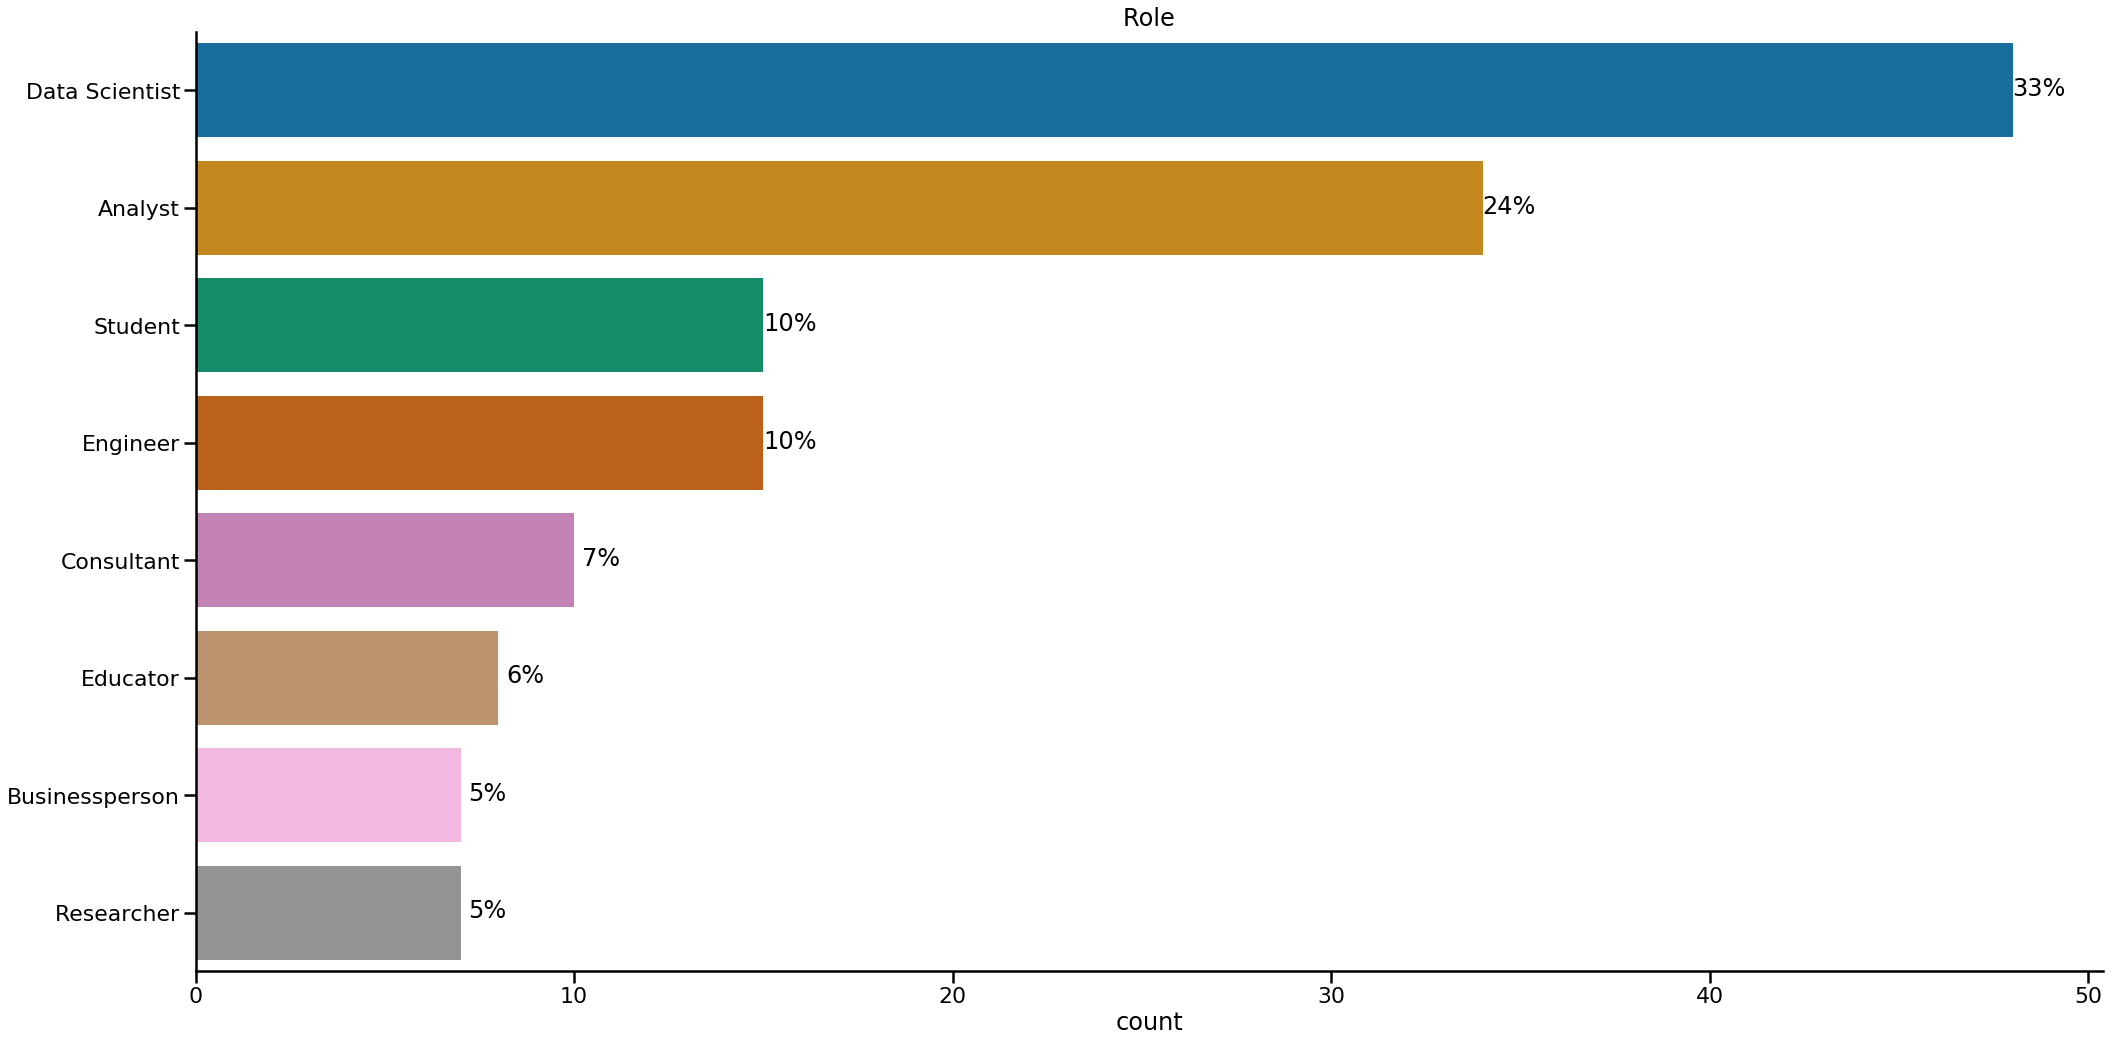

In [9]:
df_roles = df[df['Which best describes your current role?'].isin(['Data Scientist', 'Analyst', 'Engineer', 'Student', 'Educator', 'Businessperson', 'Consultant', 'Researcher'])]
plot_cat(
    df_roles,
    'Which best describes your current role?',
    ['Data Scientist', 'Analyst', 'Student', 'Engineer', 'Consultant', 'Educator', 'Businessperson', 'Researcher'],
    'Role',
    fudge=0.7,
)

In [10]:
df["What's your highest level of formal education? (We'll ask about other types of education later)"].value_counts(dropna=False)

Masters         73
Bachelors       45
Doctorate       38
Some college     6
Name: What's your highest level of formal education? (We'll ask about other types of education later), dtype: int64

# Data Scientists are less likely to have a Bachelors and more likely to have a PhD. I assume this is at least partly because many openings list a Masters or PhD as a requirement. It’s probably also self selection. A common theme is someone goes to college for a Physics or other PhD and makes a move to industry because of the competition for tenure track positions. This doesn’t mean you need a PhD to be a Data Scientist but it does mean that you’ll need to work harder to make yourself stand out.

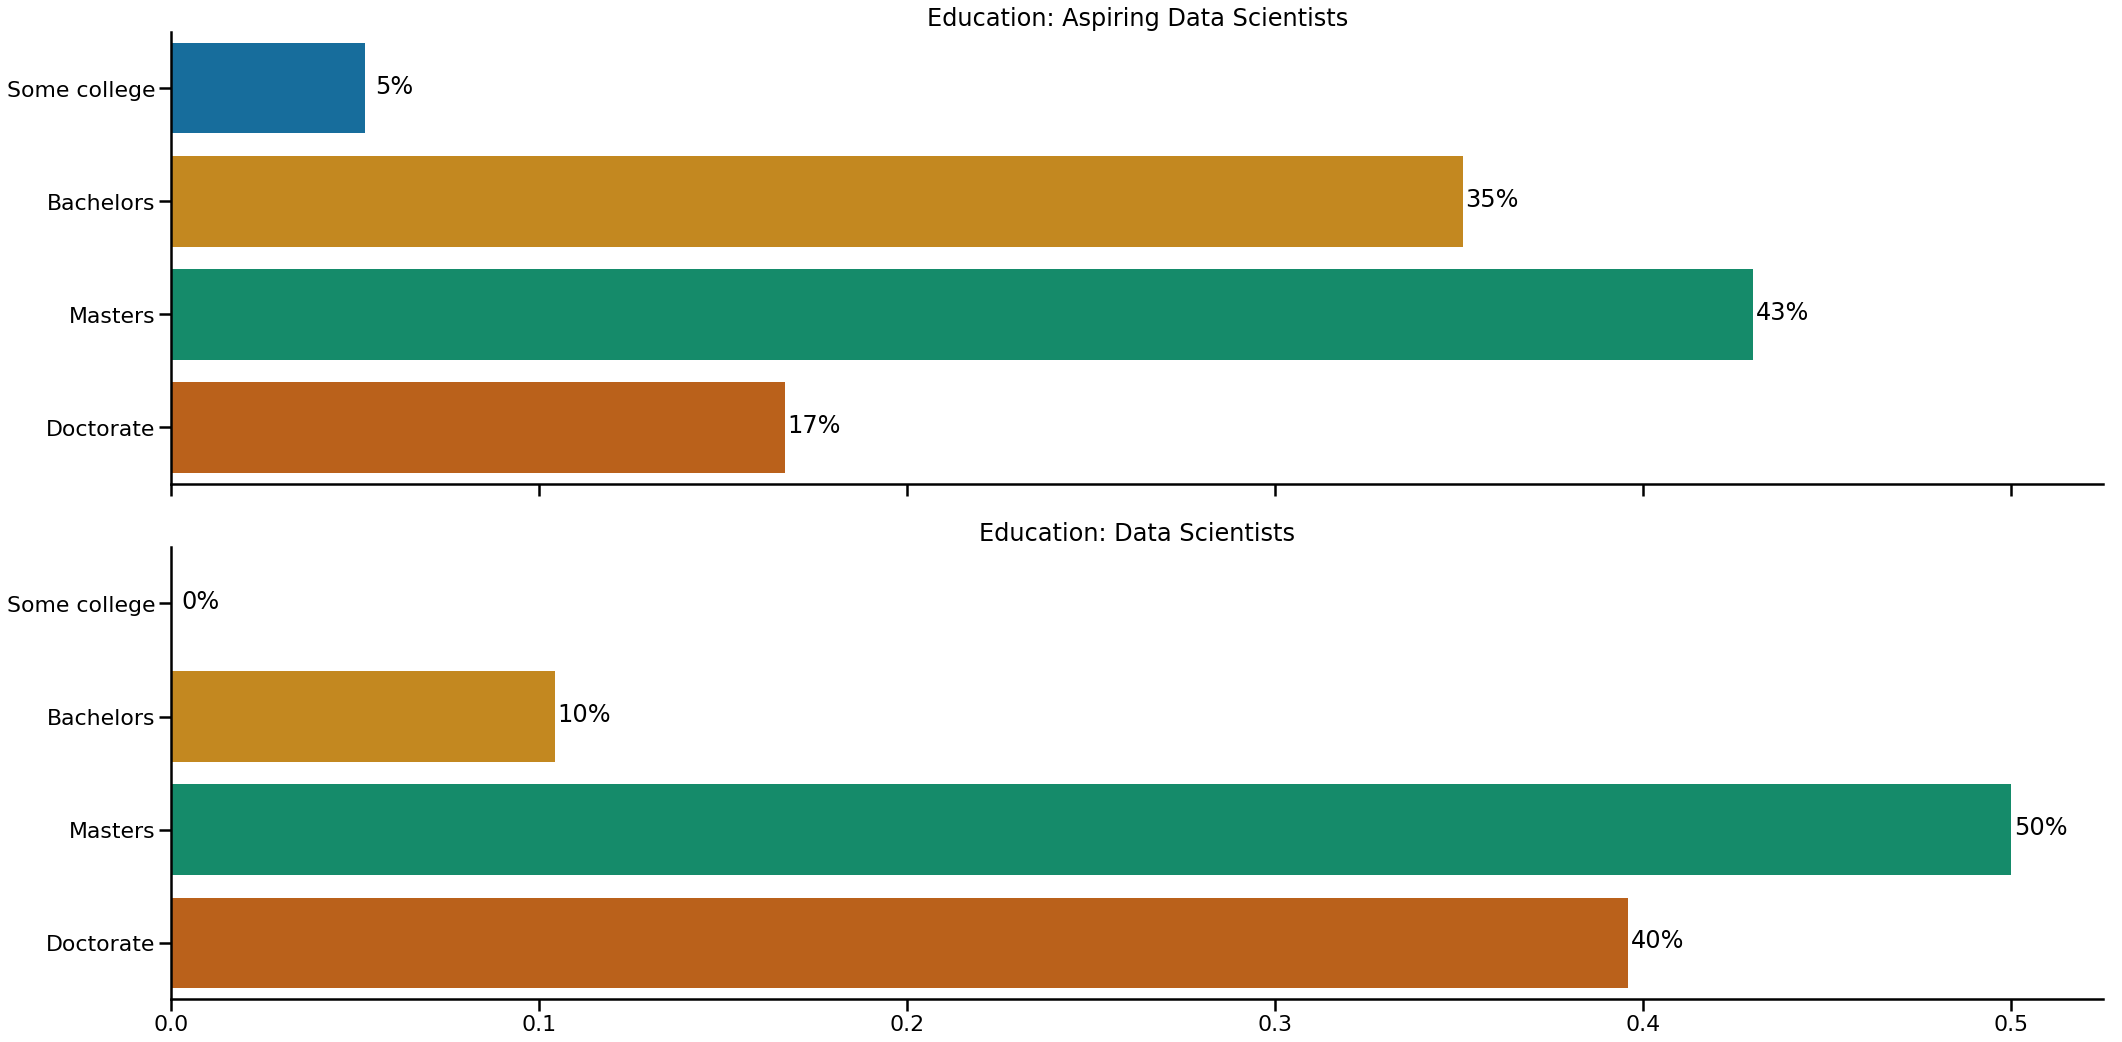

In [11]:
order = ['Some college', 'Bachelors', 'Masters', 'Doctorate']
df_ds = df[df['Which best describes your current role?'] == 'Data Scientist']
df_na_ds = df[(df['Which best describes your current role?'] != 'Data Scientist') & (df['Are you interested in a career in Data Science?'] == 'Yes')]

f, ax = plt.subplots(2, 1, figsize=(30, 15), sharex=True)
plot_bar_multi_v(df_na_ds, "What's your highest level of formal education? (We'll ask about other types of education later)", {}, order, 'Education: Aspiring Data Scientists', fudge=0.008, ax=ax[0])
plot_bar_multi_v(df_ds, "What's your highest level of formal education? (We'll ask about other types of education later)", {}, order, 'Education: Data Scientists', fudge=0.008, ax=ax[1])
f.tight_layout()

In [12]:
df['If you have a college degree, what field is it in?'].apply(fix_degree).value_counts()

Science/Math      31
Other             22
CS/IT             16
Business          16
Engineering       14
Social Science    11
Name: If you have a college degree, what field is it in?, dtype: int64

In [13]:
df['If you received a college degree, what field was it in?'].apply(fix_degree).value_counts()

Science/Math      22
CS/IT             11
Social Science     7
Business           4
Other              2
Engineering        1
Name: If you received a college degree, what field was it in?, dtype: int64

# Looking at degrees we see that the majority of Data Scientists have a Math, Science, or CS/IT degree. How much of this is self selection vs other factors like bias in the hiring process is hard to say. If you have a degree that didn’t focus on Science or Math it certainly can’t hurt to go back to school and get a degree that more focused on Data Science.

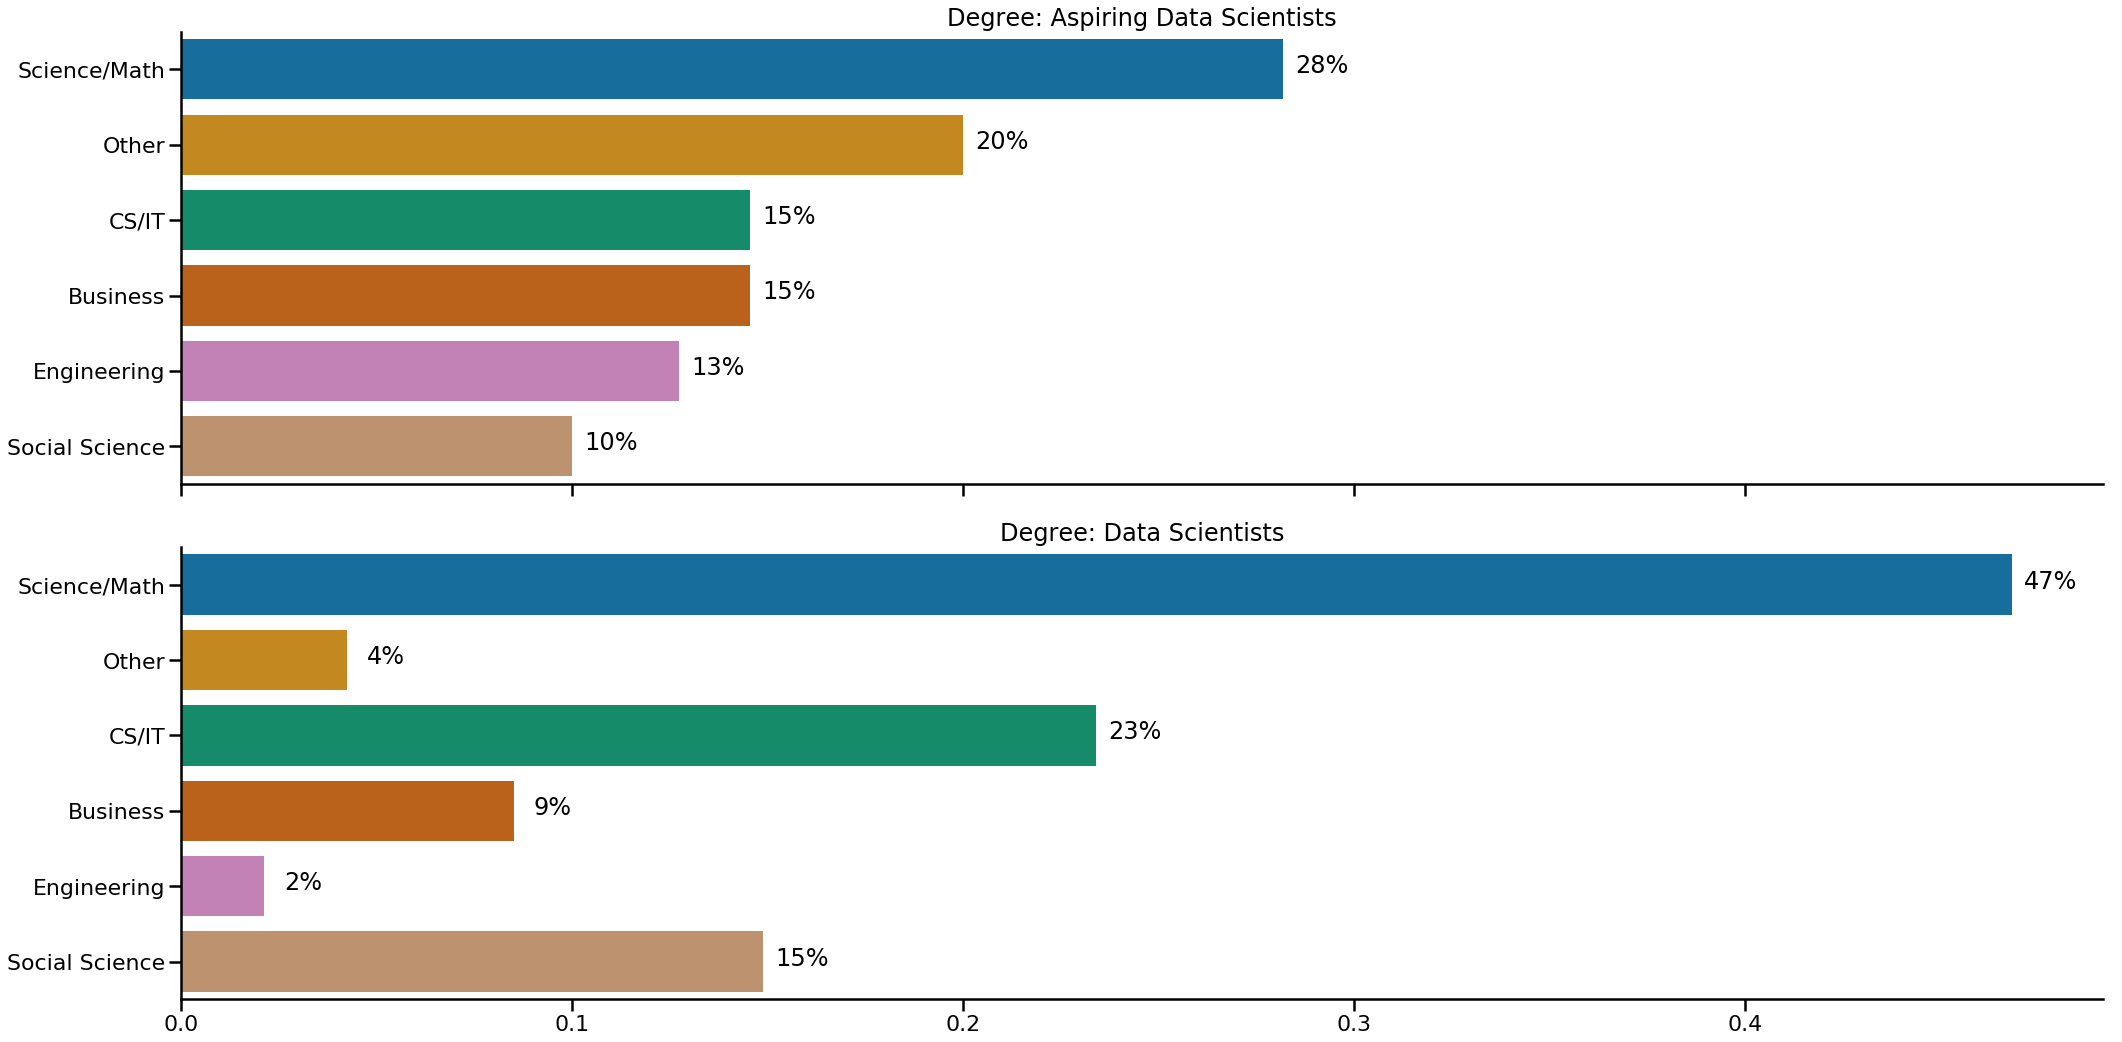

In [14]:
df['Degree: Aspiring'] = df['If you have a college degree, what field is it in?'].apply(fix_degree)
df['Degree: DS'] = df['If you received a college degree, what field was it in?'].apply(fix_degree)
edu_abbrs = {}
order = ['Science/Math', 'Other', 'CS/IT', 'Business', 'Engineering', 'Social Science']

f, ax = plt.subplots(2, 1, figsize=(30, 15), sharex=True)
plot_bar_multi_v(df, 'Degree: Aspiring', edu_abbrs, order, 'Degree: Aspiring Data Scientists', ax=ax[0], fudge=0.01)
plot_bar_multi_v(df, 'Degree: DS', edu_abbrs, order, 'Degree: Data Scientists', ax=ax[1], fudge=0.01)
f.tight_layout()

In [15]:
c = Counter()
for v in [a.split(';') for i, a in df['How have you prepared for a career in Data Science?'].items() if pd.notna(a)]:
    c.update(v)
c.most_common(10)

[('Self-study', 90),
 ('Free online courses', 71),
 ('In person events (conferences/meetups/clubs)', 63),
 ('Paid online courses', 44),
 ('Blogs/Videos', 41),
 ('In-person college degree', 40),
 ('Data Science competitions (Kaggle, etc...)', 16),
 ('Online college degree', 11),
 ('Bootcamp', 5),
 ('On the job training. ', 1)]

In [16]:
c = Counter()
for v in [a.split(';') for i, a in df['How did you prepare for a career in Data Science?'].items() if pd.notna(a)]:
    c.update(v)
c.most_common(10)

[('Self-study', 40),
 ('In-person college degree', 25),
 ('Free online courses', 22),
 ('In person events (conferences/meetups/clubs)', 18),
 ('Paid online courses', 15),
 ('Blogs/Videos', 12),
 ('Data Science competitions (Kaggle, etc...)', 9),
 ('Online college degree', 6),
 ('Bootcamp', 2),
 ('Internship', 1)]

# Interestingly (or not) we see that Data Scientists attribute their college degrees towards helping them prepare for a career in Data Science a lot more than aspiring Data Scientists. Would going back to college be helpful for getting a job in Data Science? It’s hard to say but it probably can’t hurt! Bootcamps on the other hand don’t seem to have any real signal. Maybe they’re still too new for us to measure their impact? Or maybe they’re just a fad?

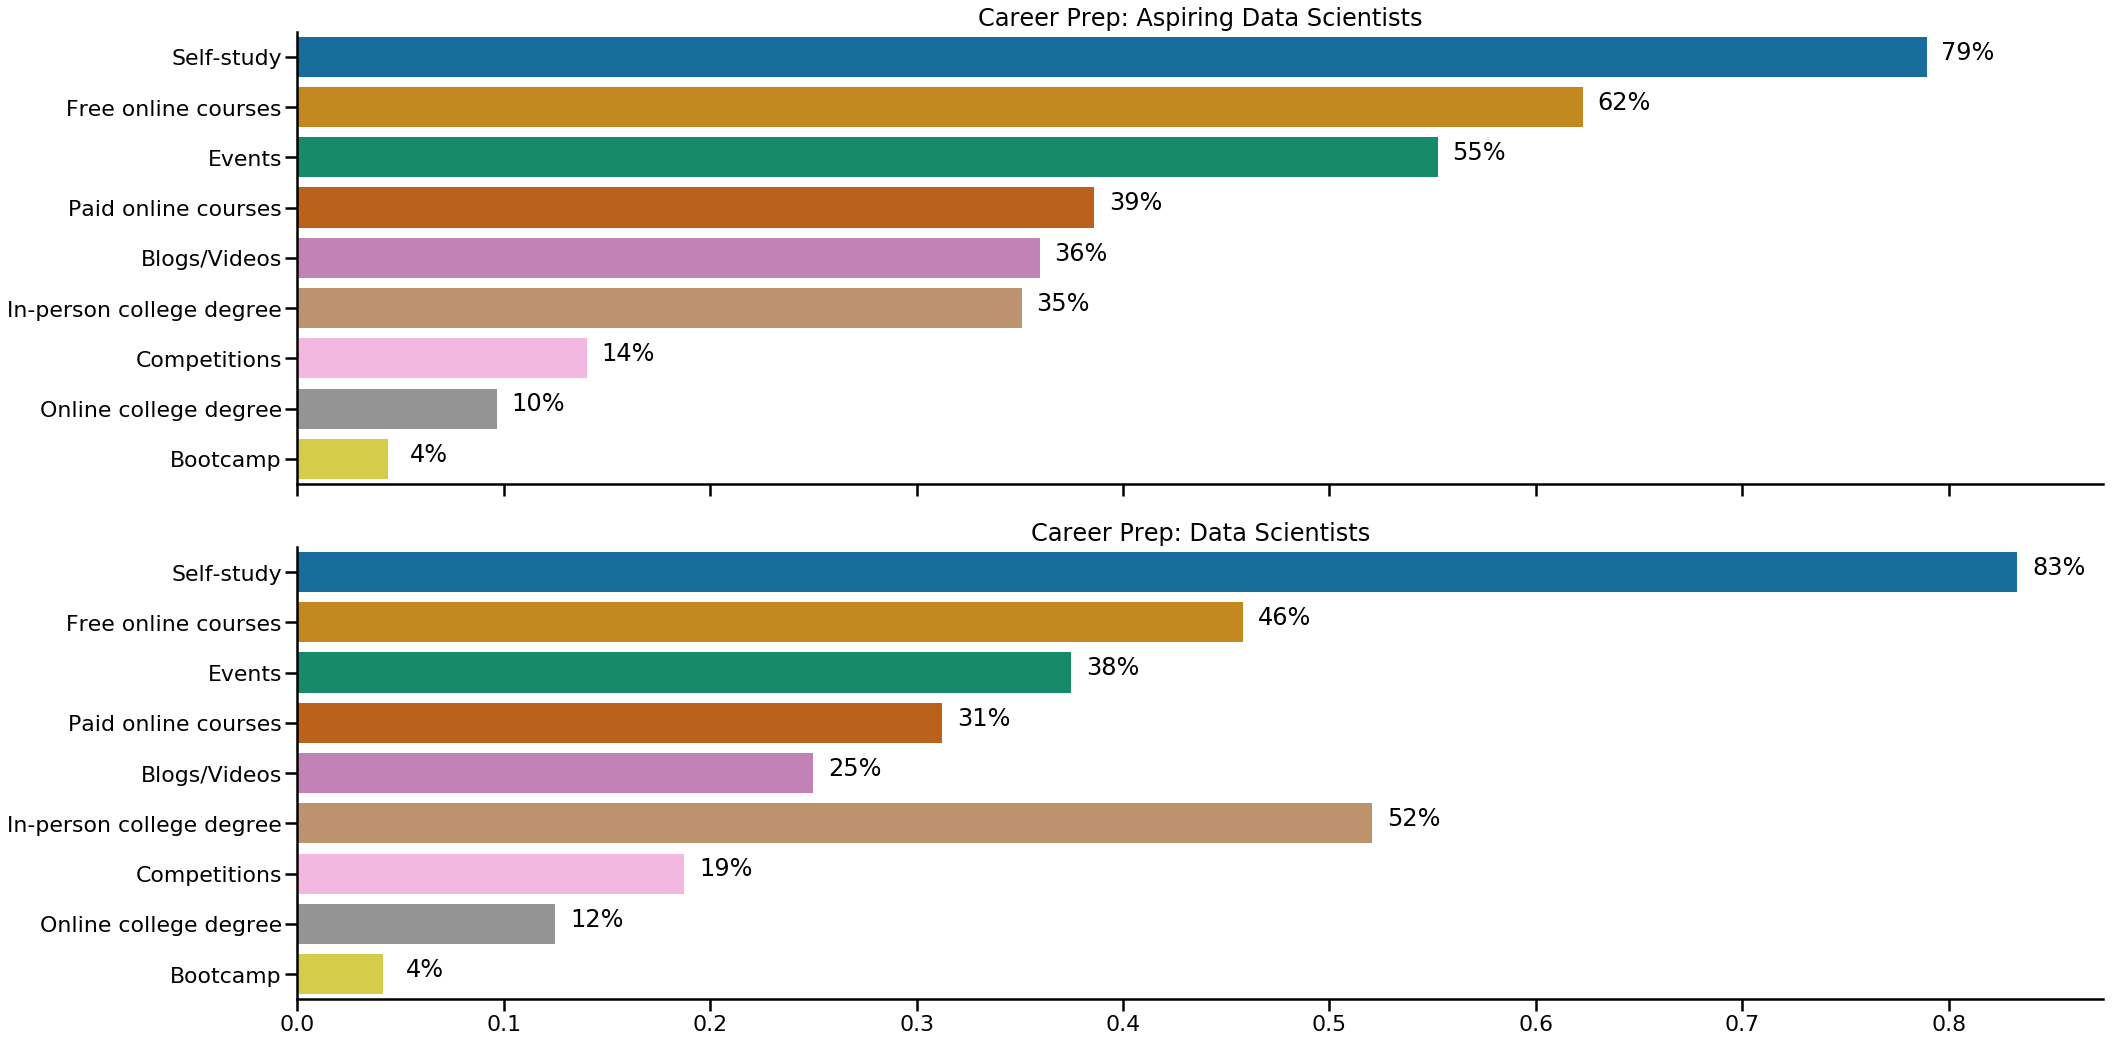

In [17]:
edu_abbrs = {'In person events (conferences/meetups/clubs)': 'Events', 'Data Science competitions (Kaggle, etc...)': 'Competitions'}
order = ['Self-study', 'Free online courses', 'In person events (conferences/meetups/clubs)', 'Paid online courses','Blogs/Videos', 'In-person college degree', 'Data Science competitions (Kaggle, etc...)', 'Online college degree',  'Bootcamp']

f, ax = plt.subplots(2, 1, figsize=(30, 15), sharex=True)
plot_bar_multi_v(df, 'How have you prepared for a career in Data Science?', edu_abbrs, order, 'Career Prep: Aspiring Data Scientists', ax=ax[0])
plot_bar_multi_v(df, 'How did you prepare for a career in Data Science?', edu_abbrs, order, 'Career Prep: Data Scientists', ax=ax[1])
f.tight_layout()

In [18]:
df['If you could go back in time and focus more time on a particular skill set, what would it be?'].str.get_dummies(
    ';').sum().T.sort_values(ascending=False)

Mathematics (e.g. Statistics, Linear Algebra, etc...)                    29
Coding                                                                   19
Machine Learning                                                         18
Communication Skills                                                     15
Visualization                                                            12
Data Analysis                                                             7
statistics                                                                1
big data tools, good programming practices (reproducibility, modular)     1
Software Engineering                                                      1
Data engineering and reproducibility / git                                1
Data architecture (SQL, ETL, etc)                                         1
Computer science (not just coding                                         1
Computer science                                                          1
 big-picture

# When asked if they could go back in time and focus more time on a particular subject the majority of Data Scientists said they would like to have spent more time on Math skills.

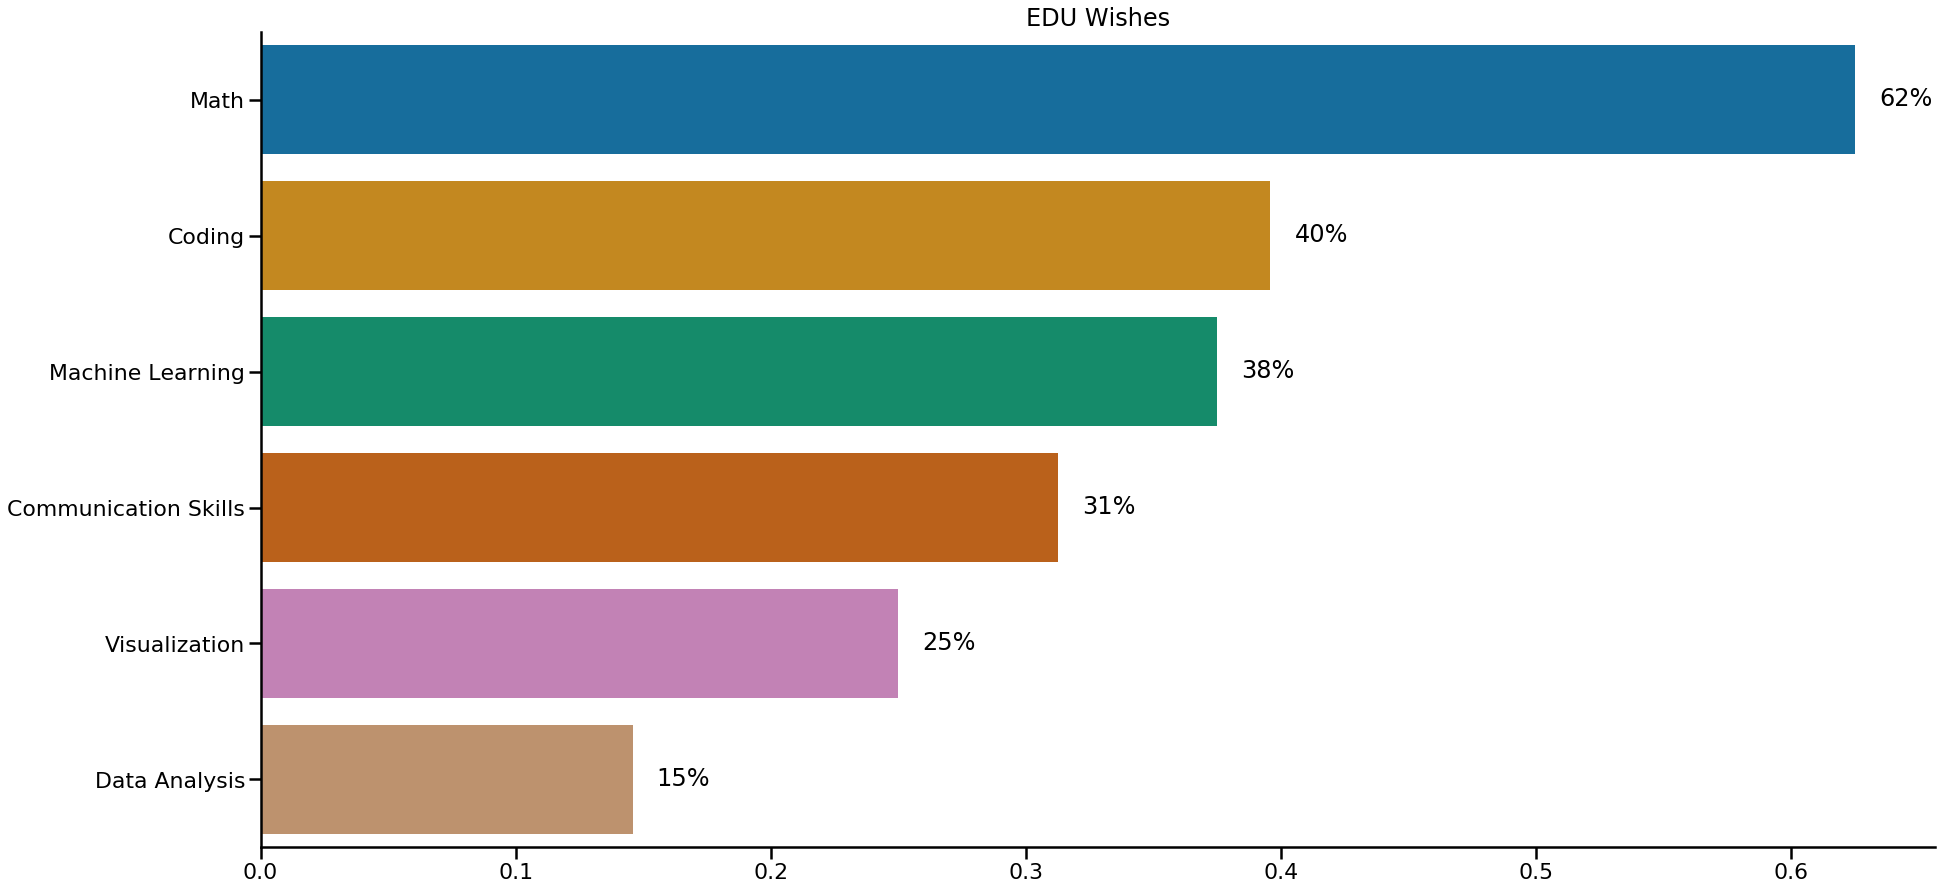

In [32]:
abbr = {'Mathematics (e.g. Statistics, Linear Algebra, etc...)': 'Math', 'Computer science': 'Math',
        'statistics': 'Math', 'Data engineering and reproducibility / git': 'Coding', 'Data architecture (SQL, ETL, etc)': 'Coding'}
order = ['Math', 'Coding', 'Machine Learning', 'Communication Skills', 'Visualization', 'Data Analysis']
plot_bar_multi(
    df,
    'If you could go back in time and focus more time on a particular skill set, what would it be?',
    abbr,
    order,
    'EDU Wishes',
)

In [20]:
df['What tools do you use on a daily basis?'].dropna().str.get_dummies(sep=';').sum().T.sort_values(ascending=False)

Python                               32
SQL                                  32
R                                    25
Excel                                19
Tableau/PowerBI                       7
Spark                                 6
Hadoop                                6
SAS                                   3
SPSS                                  2
Scala, Java                           1
Open source BI (Redash, Metabase)     1
Looker                                1
Slack :/, JIRA, git                   1
C++, Gnuplot                          1
Brain. I'm not being facetious.       1
ArcGIS                                1
AWS                                   1
dtype: int64

# When asked what kinds of tools they use on a daily basis data scientists overwhelmingly use Python. SQL comes in a close second beating out R. Focusing on these top tools will help ensure you’re prepared for a job in Data Science. This mirrors lots of other surveys so the results aren't terribly surprising.

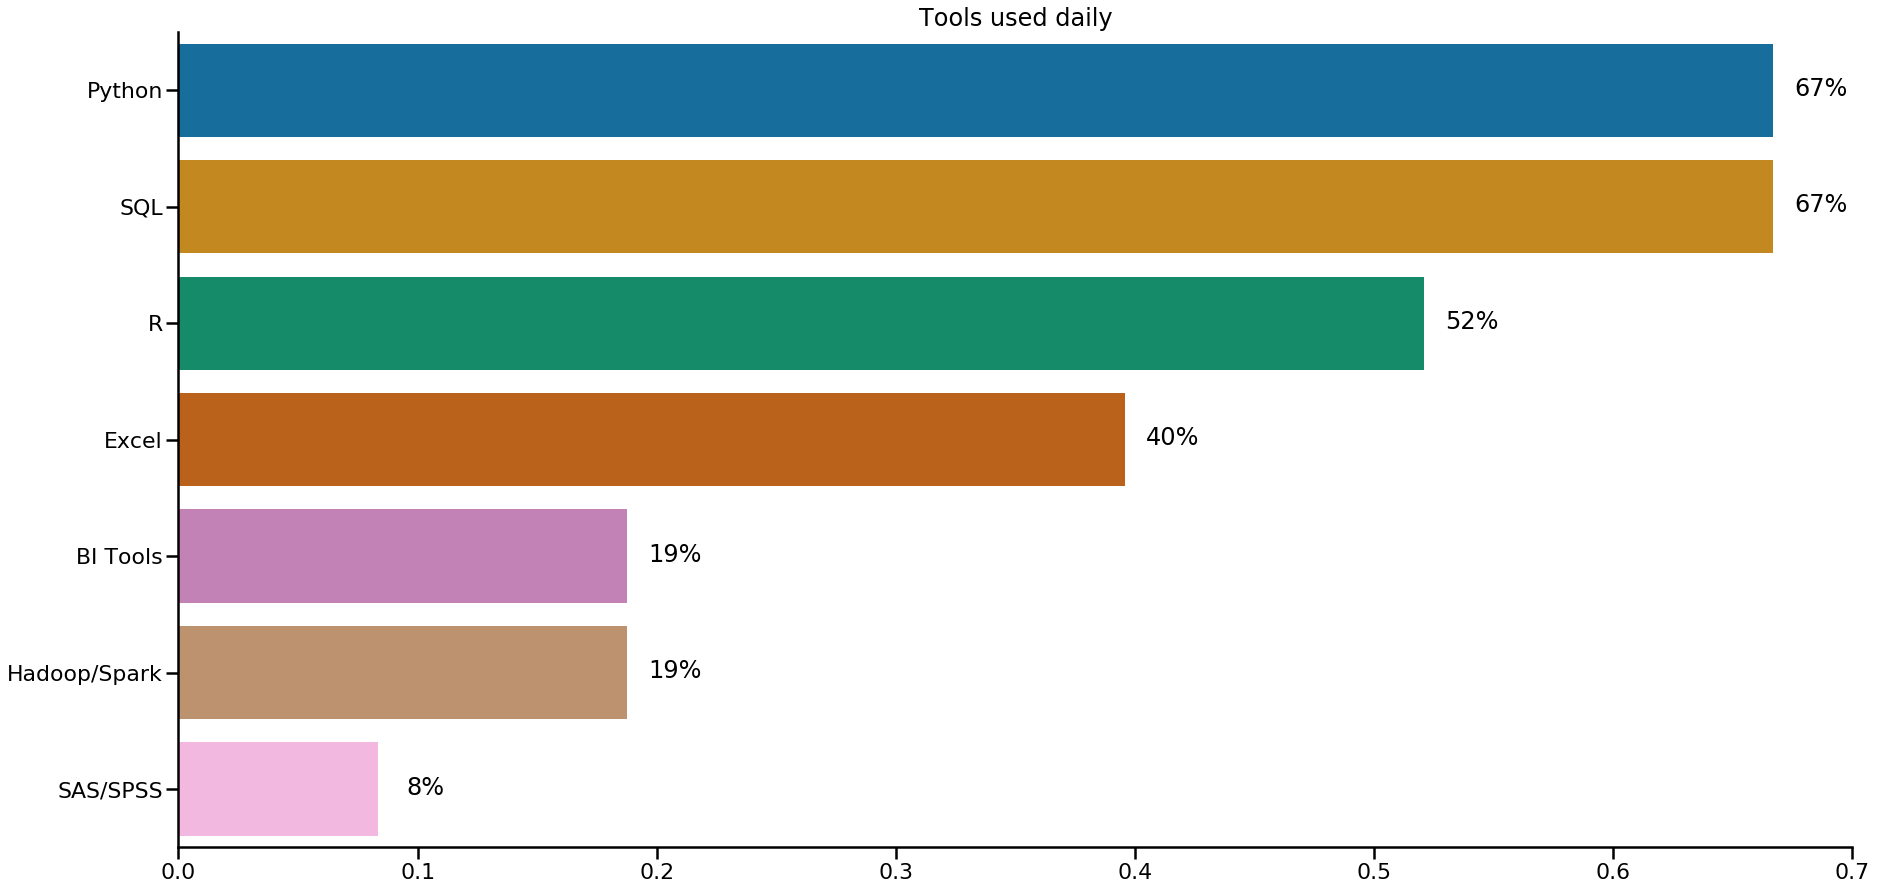

In [21]:
abbr = {'Looker': 'BI Tools', 'Tableau/PowerBI': 'BI Tools', 'Open source BI (Redash, Metabase)': 'BI Tools', 'Hadoop': 'Hadoop/Spark', 'Spark': 'Hadoop/Spark', 'SAS': 'SAS/SPSS', 'SPSS': 'SAS/SPSS'}
order = ['Python', 'SQL', 'R', 'Excel', 'BI Tools', 'Hadoop/Spark', 'SAS/SPSS']
plot_bar_multi(
    df,
    'What tools do you use on a daily basis?',
    abbr,
    order,
    'Tools used daily',
)

In [22]:
df['On average, how much time do you spend building models?'].value_counts(dropna=False)

NaN                      114
1-10 hours per week       31
<1 hour per week           8
10-20 hours per week       6
I don't create models      2
20-40 hours per week       1
Name: On average, how much time do you spend building models?, dtype: int64

# I feel like this chart is trying to tell me something about my survey design abilities. We can see that the vast majority of respondents spend less than 1/4 of their time building models. As a Data Scientist, you should be prepared to spend most of your time doing data manipulation and analysis. If you’re hoping to get into Data Science so that you can build models all day, you’re better off looking for a career as a ML Research Scientist which means you will almost certainly need a PhD with a thesis on Deep Learning. If Data Scientists are unicorns Research Scientists are Uber Unicorns. I’ve known researchers who have sought out these roles at big companies and even for qualified candidates it’s hard to achieve.

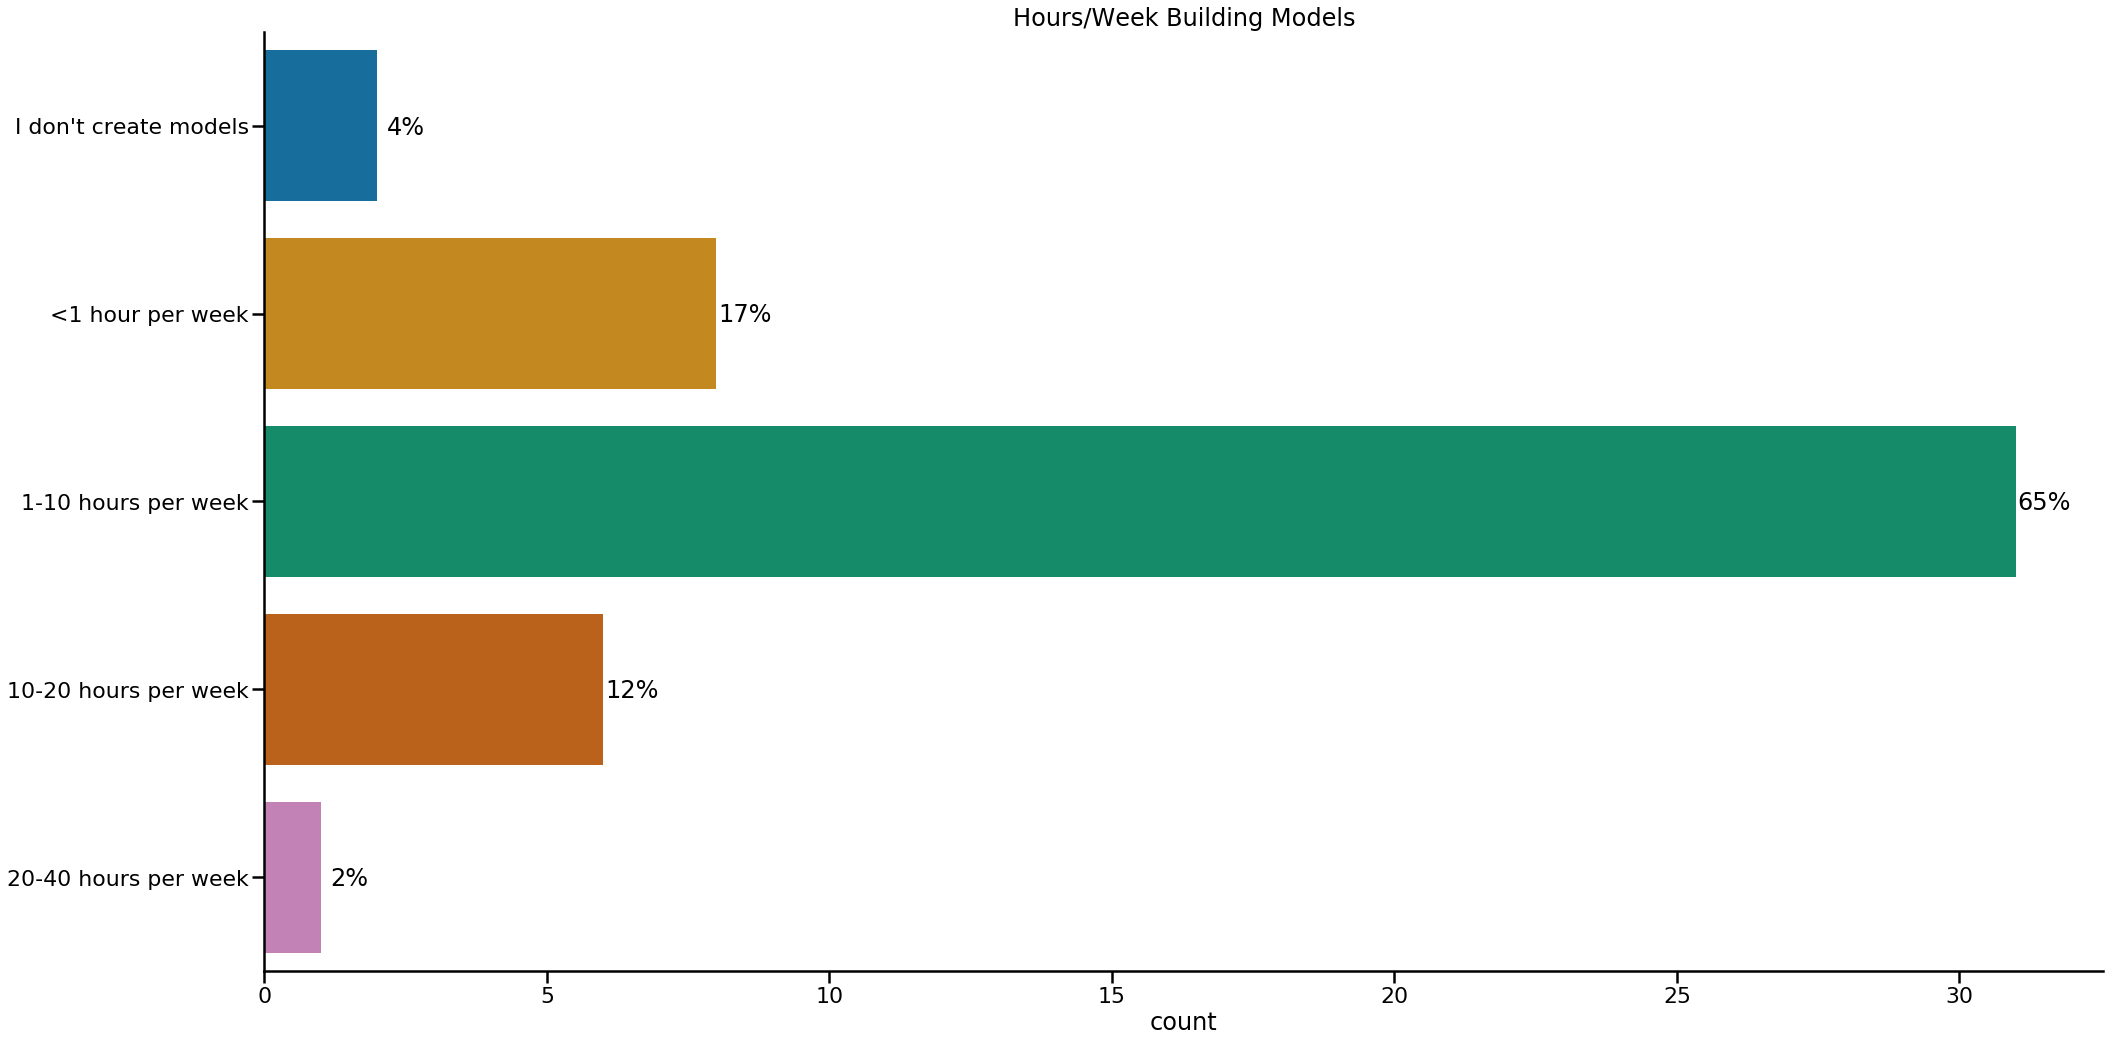

In [23]:
plot_cat(
    df,
    'On average, how much time do you spend building models?',
    ["I don't create models", '<1 hour per week', '1-10 hours per week', '10-20 hours per week', '20-40 hours per week'],
    'Hours/Week Building Models',
)

# Speaking of Deep Learning, it’s still not very popular in industry. While it’s useful to have some Deep Learning knowledge to make yourself standout in the crowd, you probably won’t be using it on the job. If you’re looking for a job applying Deep Learning you should probably consider a research position. There are still very few applications where it really makes sense to use Deep Learning. Simple models often get the job done!

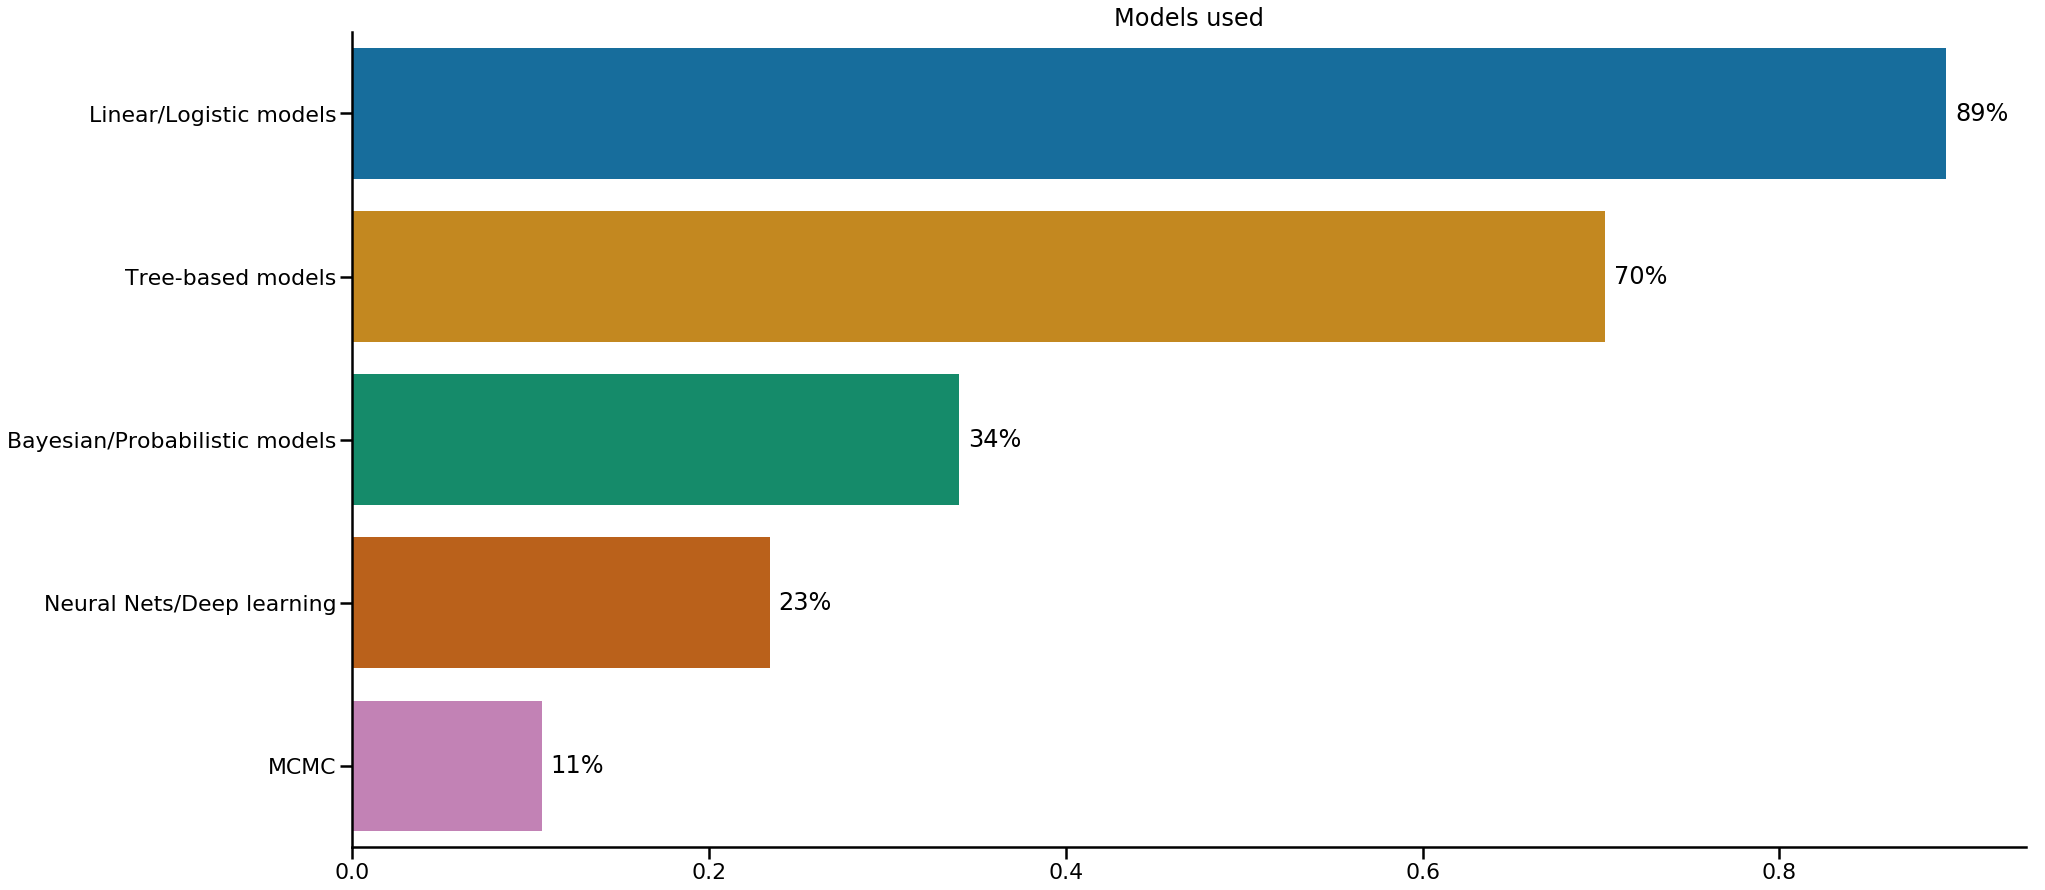

In [24]:
plot_bar_multi(
    df,
    'Which modeling techniques do you use frequently?',
    ['See above'],
    ['Linear/Logistic models', 'Tree-based models', 'Bayesian/Probabilistic models', 'Neural Nets/Deep learning', 'MCMC'],
    'Models used',
)

In [25]:
df['How many years of work experience do you have (in Data Science or a related field)?'].value_counts()

< 5 years      22
5-8 years      19
9-12 years      4
> 20 years      2
13-16 years     1
Name: How many years of work experience do you have (in Data Science or a related field)?, dtype: int64

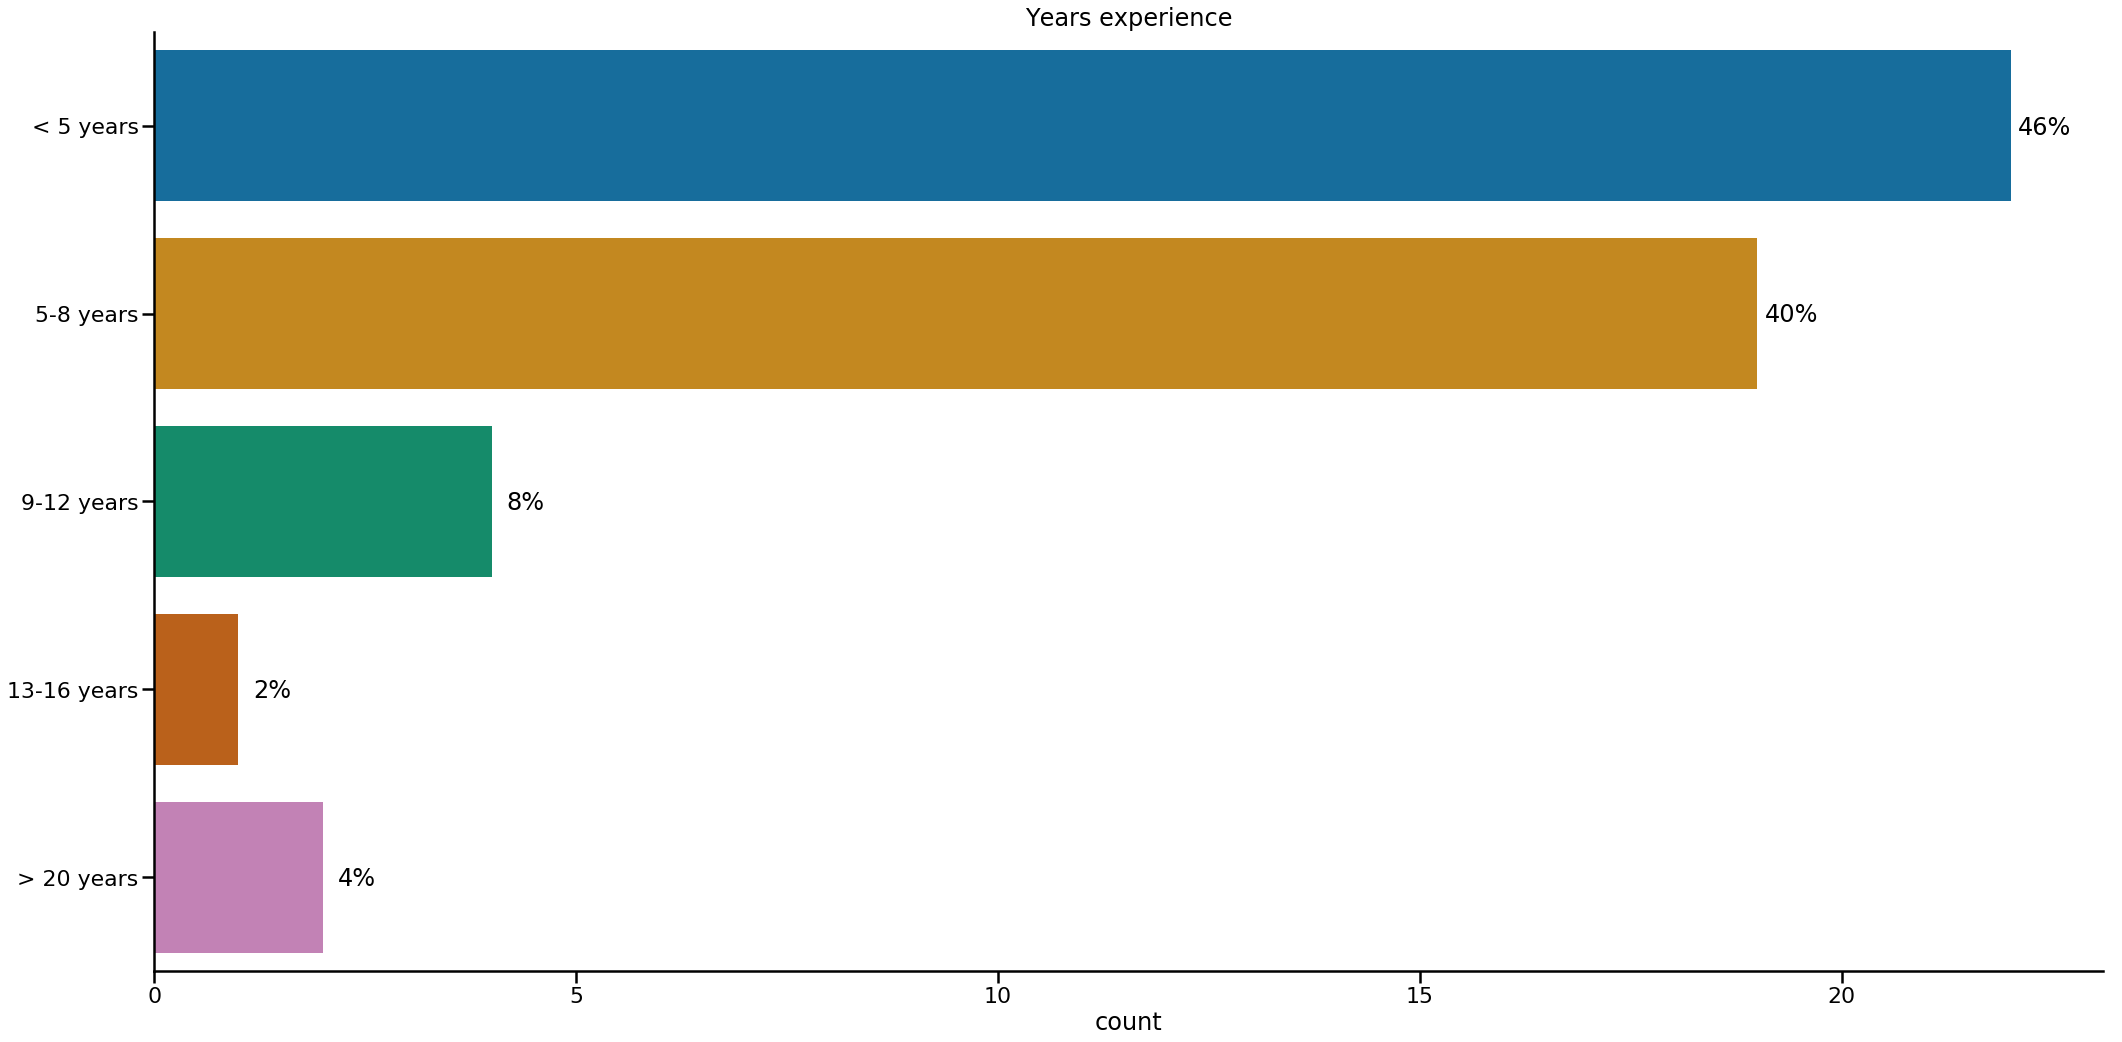

In [26]:
plot_cat(
    df,
    'How many years of work experience do you have (in Data Science or a related field)?',
    ['< 5 years', '5-8 years', '9-12 years', '13-16 years', '> 20 years'],
    'Years experience',
    fudge=0.4
)

# The biggest industry hiring data scientists in Philly seems to be the medical/healthcare industry. This isn’t too surprising, our area is well known for both healthcare and pharmaceutical companies. These companies could be a good place to start looking.

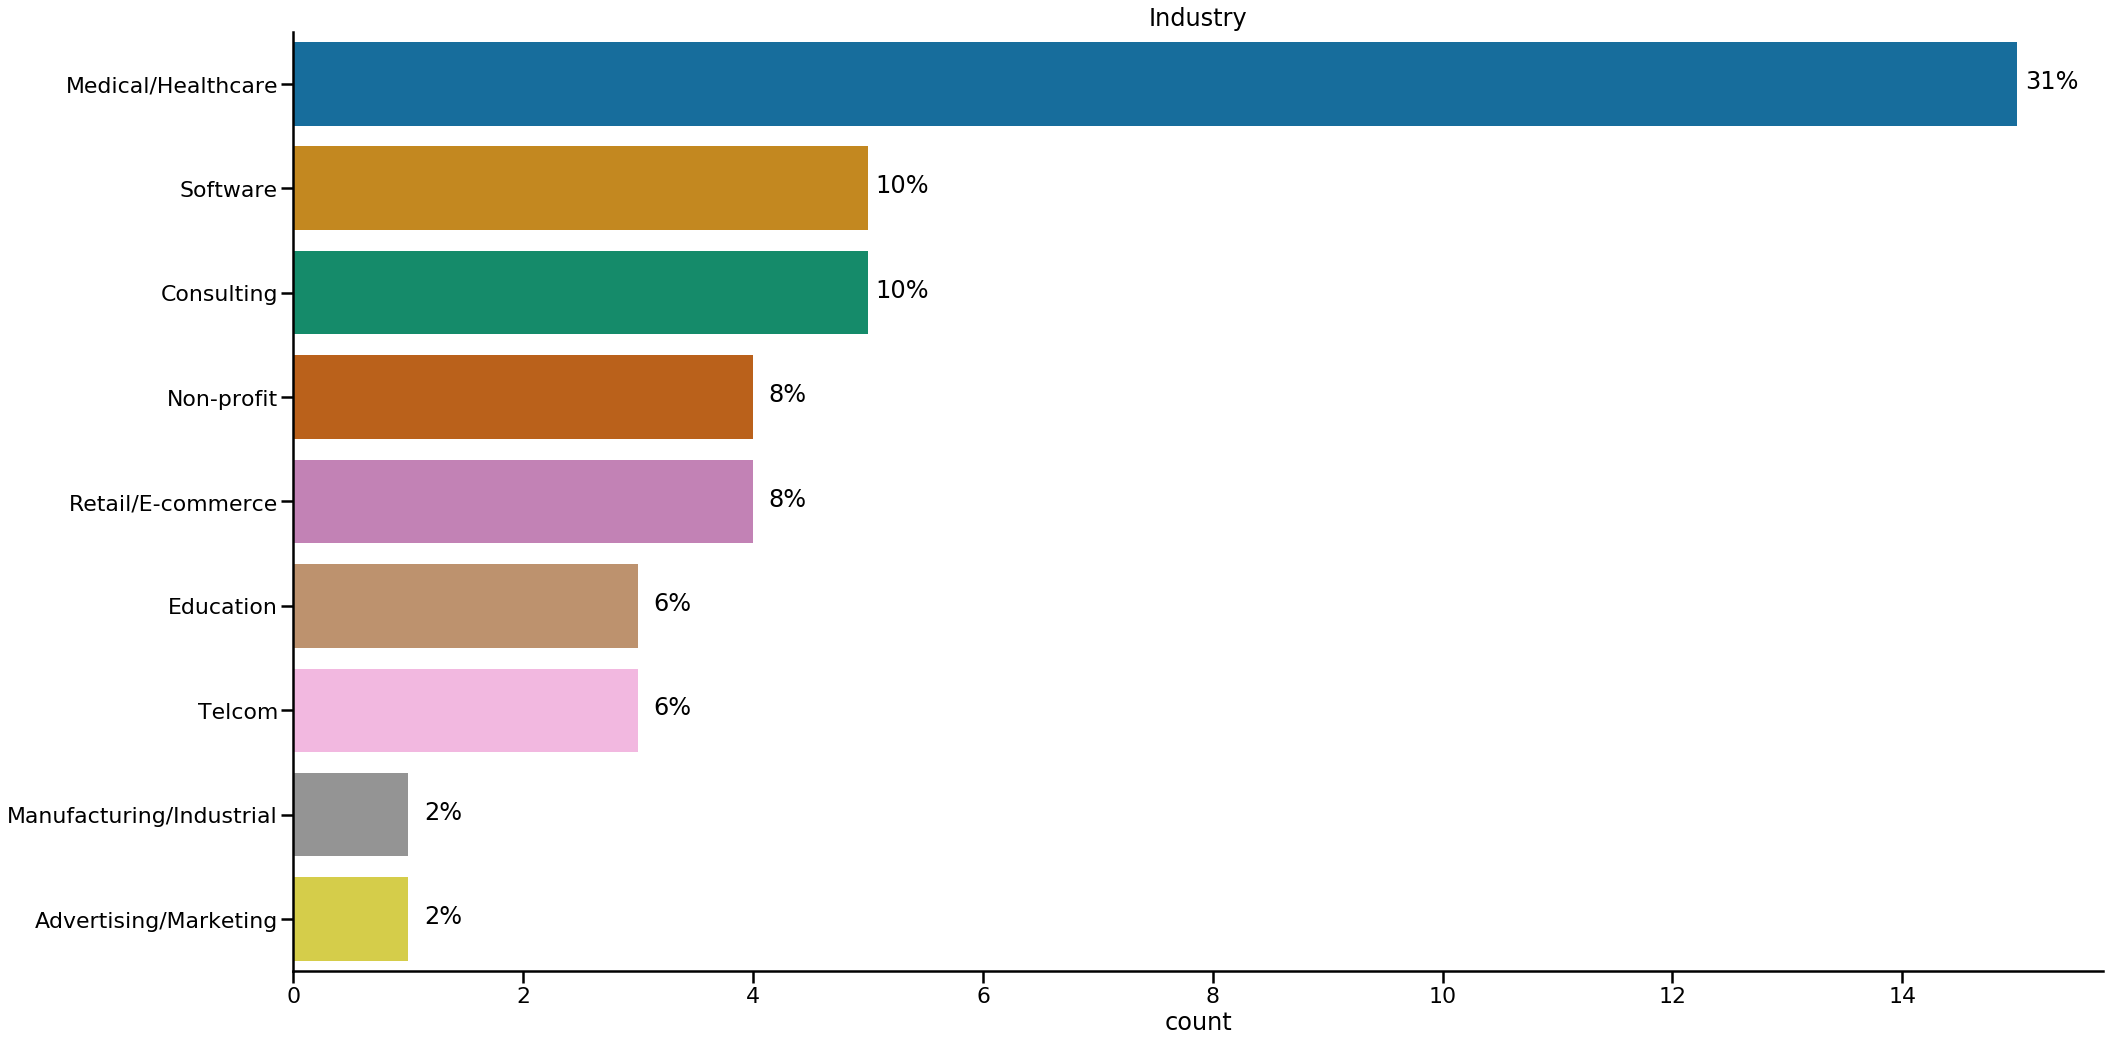

In [27]:
plot_cat(
    df,
    'What industry do you work in?',
    ['Medical/Healthcare', 'Software', 'Consulting', 'Non-profit', 'Retail/E-commerce',  'Education', 'Telcom', 'Manufacturing/Industrial', 'Advertising/Marketing'],
    'Industry',
    fudge=0.3
)

# Most Data Scientists work in the city with some also in the suburbs. If you live in the suburbs be prepared to commute into center city.

In [28]:
df['Where do you work?'].value_counts()

Philadelphia                                             23
Philadelphia suburbs (within 20 miles of center city)    13
New Jersey                                                4
Delaware                                                  3
Remote (But live in Philly!)                              1
Austin, TX                                                1
Washington, DC                                            1
New York                                                  1
remote                                                    1
Name: Where do you work?, dtype: int64

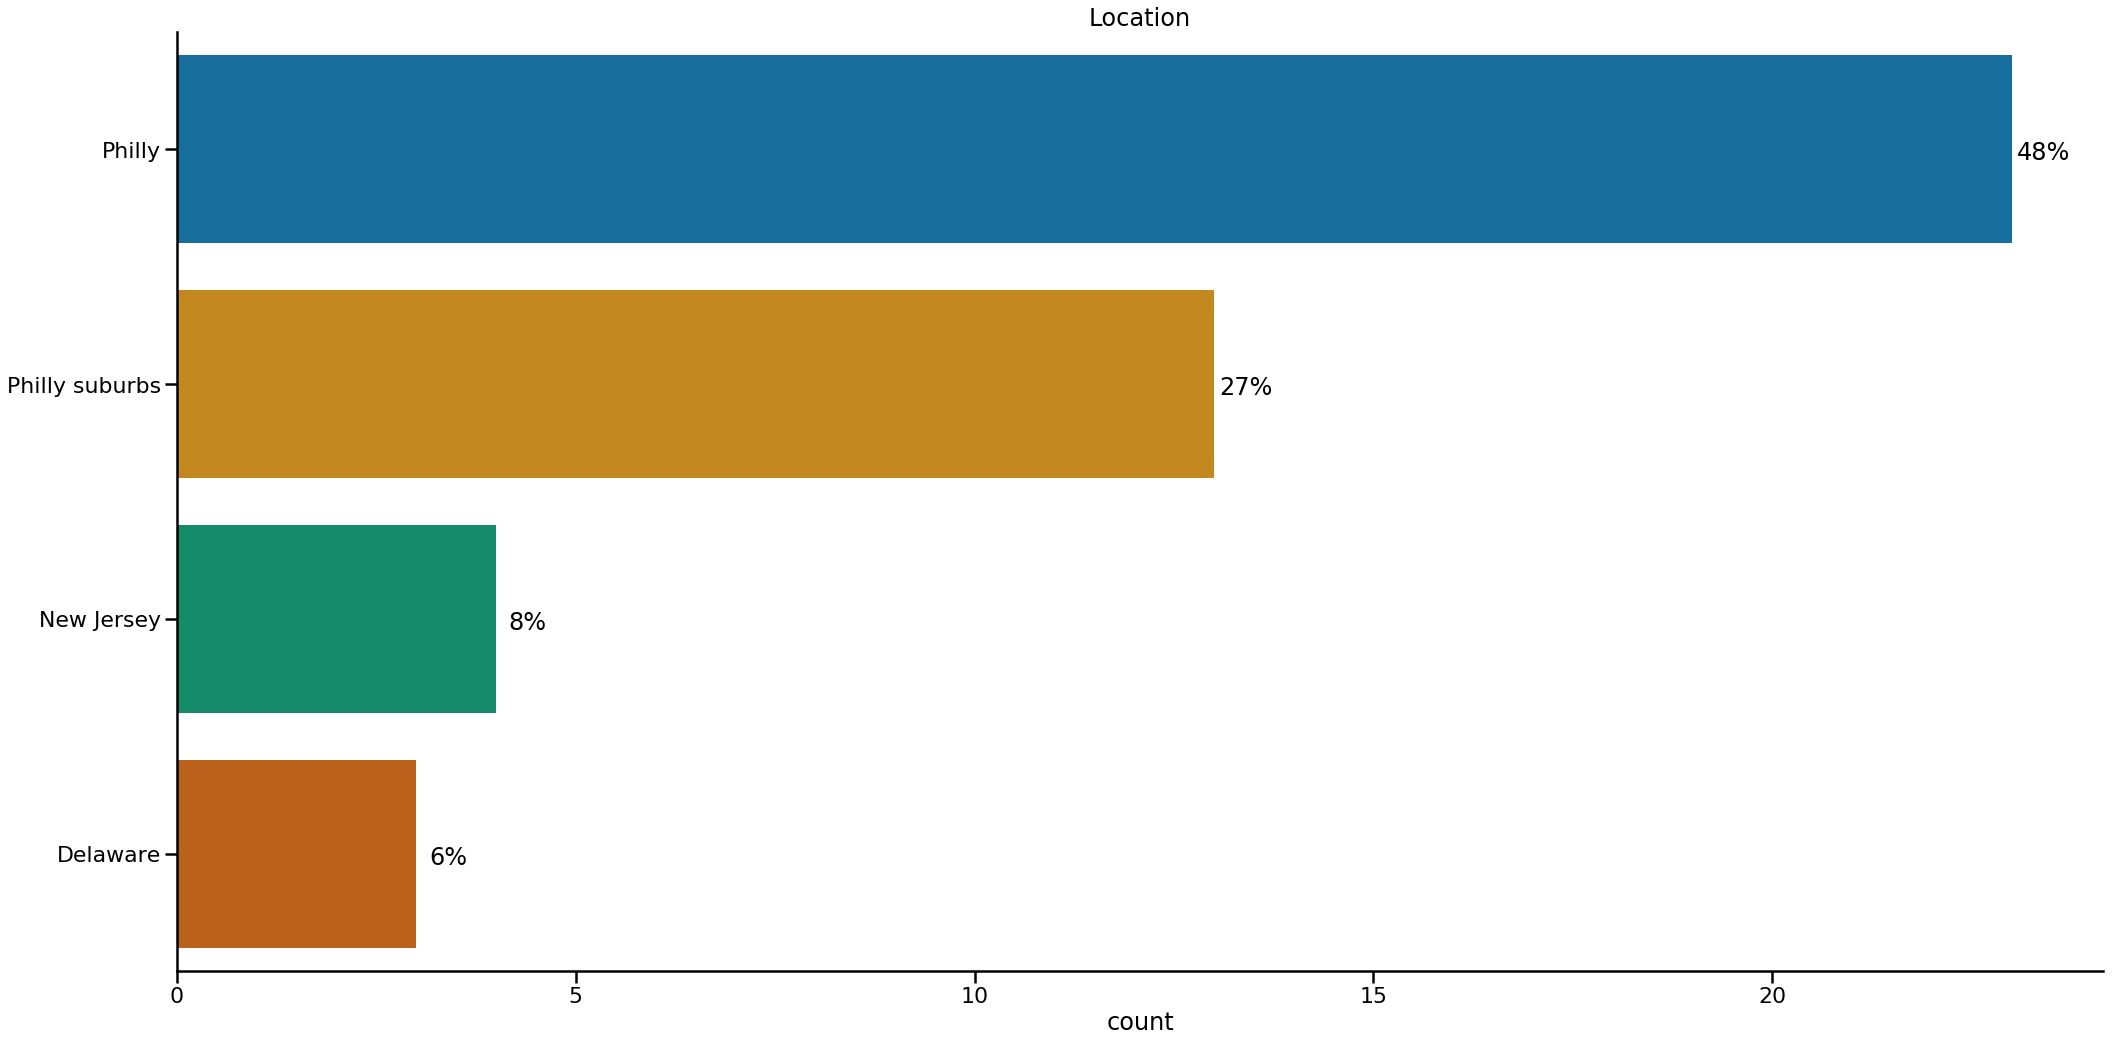

In [29]:
abbrs = {'Philadelphia suburbs (within 20 miles of center city)': 'Philly suburbs', 'Philadelphia': 'Philly'}
df['Work'] = df['Where do you work?'].apply(lambda x: abbrs.get(x, x))
plot_cat(
    df,
    'Work',
    ['Philly', 'Philly suburbs', 'New Jersey', 'Delaware'],
    'Location',
    fudge=0.4
)

In [30]:
df['How big was the first company you worked at (as a Data Scientist)?'].value_counts()

250+             14
50-249            8
1-9 employees     3
10-49             2
Name: How big was the first company you worked at (as a Data Scientist)?, dtype: int64

# When asked where they got their first Data Science job, the majority of respondents said it was at a large company. Large companies tend to have more mature Data Science strategies and bigger budgets so this isn’t too surprising.

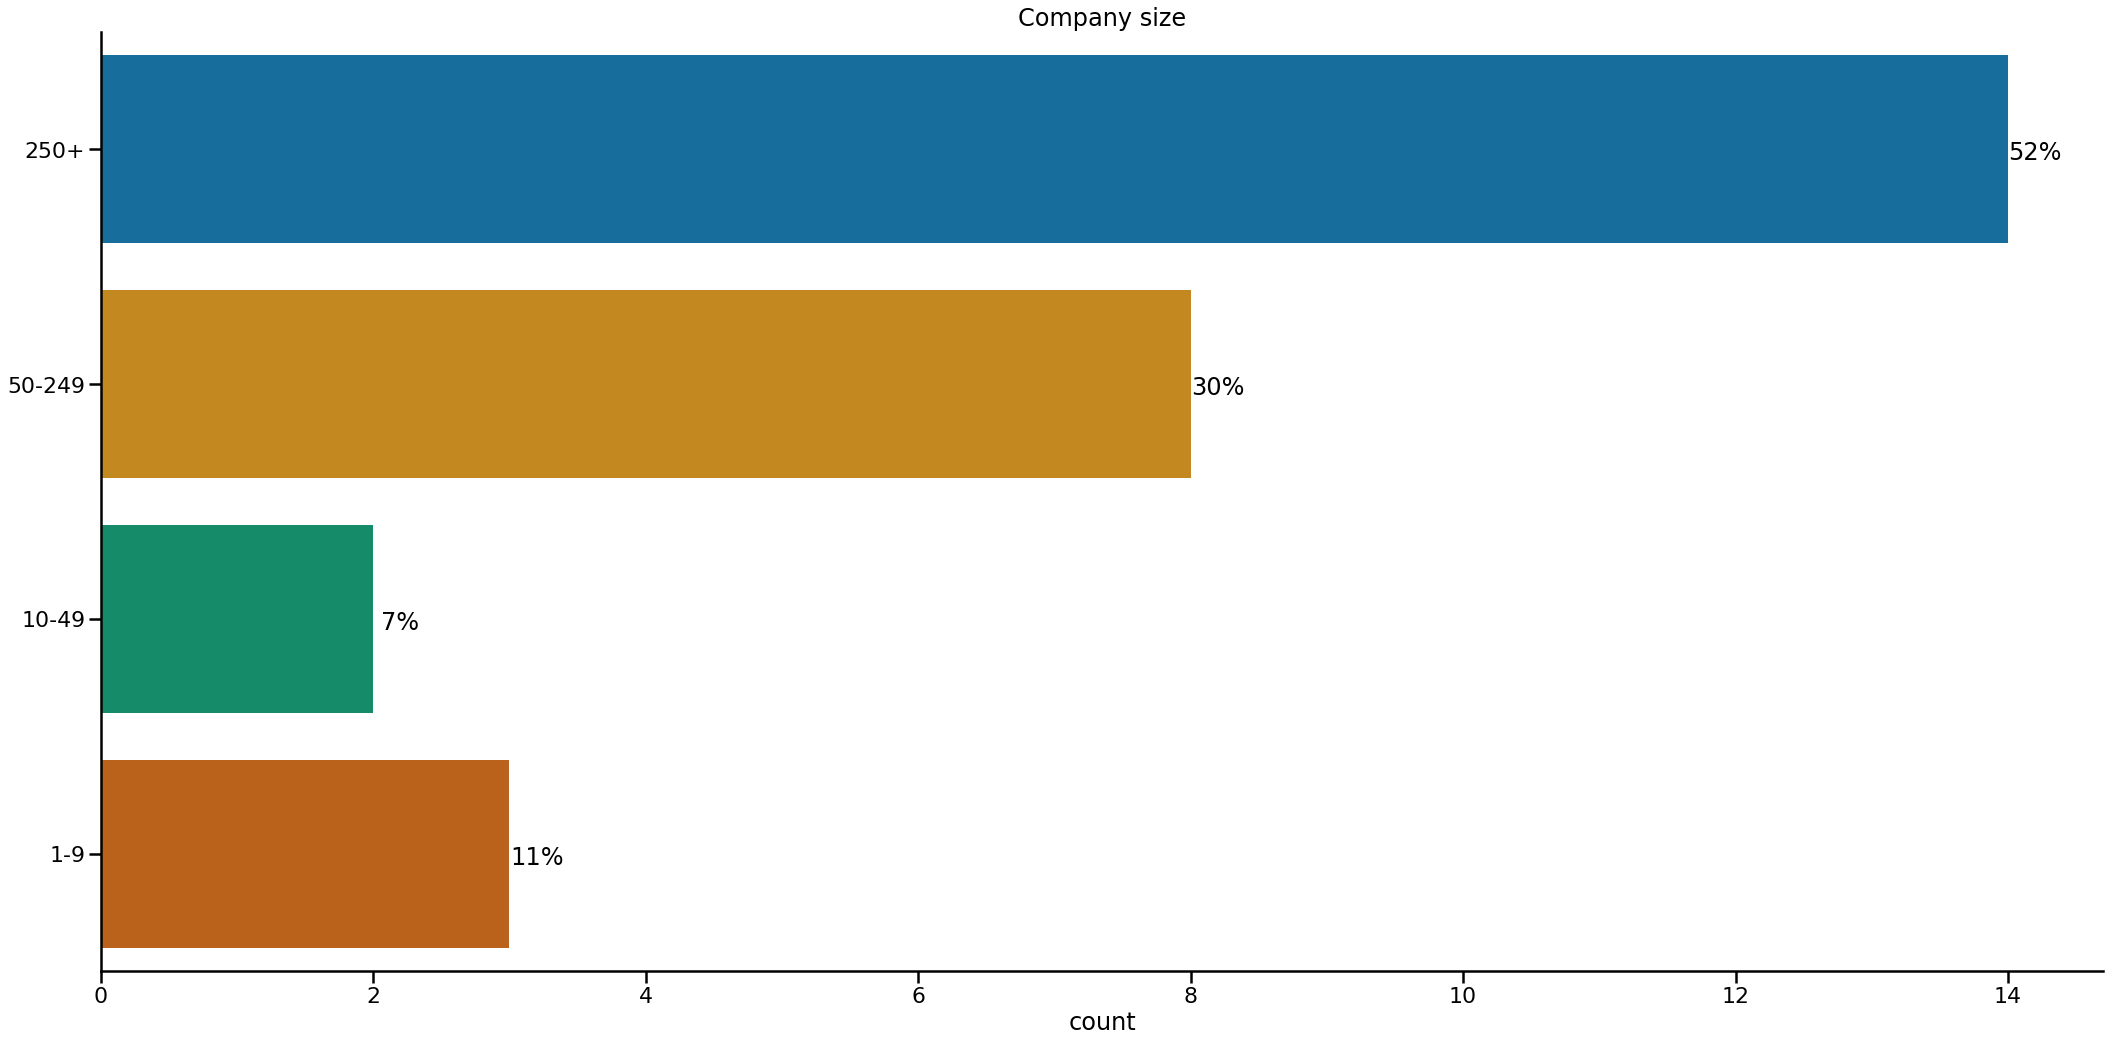

In [31]:
abbrs = {'1-9 employees': '1-9'}
df['Size'] = df['How big was the first company you worked at (as a Data Scientist)?'].apply(lambda x: abbrs.get(x, x))
plot_cat(
    df,
    'Size',
    ['250+', '50-249', '10-49', '1-9'],
    'Company size',
    fudge=0.2
)